# My First Machine Learning Program

## Introduction
There is no better way to learn Machine Learning than to experiment with it! This notebook guides you through some examples and challenges you to write your own ML code as well. Feel free to modify the code, try to understand it. 

Execute all cells in order, from the beginning. The red TO DO cells are.. well, TO DO actions for you :-)


First things first, we need a few libraries.

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display

print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('scikit-learn version:', sk.__version__)
print('matplotlib version:', matplotlib.__version__)

%matplotlib inline

numpy version: 1.18.1
pandas version: 1.0.1
scikit-learn version: 0.22.1
matplotlib version: 3.1.3


The algorithm you are going to use is known as **k-NN (k-Nearest Neighbors) classification**.

## The supervised learning classification steps: overview

This notebook shows briefly the steps of applying supervised machine learning techniques:

1. Data preparation and cleaning, 
1. Data exploration, 
1. Selecting features, 
1. Dividing your data into a training and test set, 
1. Training your machine learning algorithm, 
1. Evaluating the results by applying the model to the test data, 
1. and Applying the model "in the wild".

You will learn more about these from other materials. For now, try to read the code and experiment with it.

<div class="alert-danger alert" role="alert-danger">
    <h4>TO DO</h4>
Check <a href="https://algobeans.com/2016/09/14/k-nearest-neighbors-anomaly-detection-tutorial/">this tutorial</a>
     to understand how k-NN works and to learn some interesting stuff about wines :-)
</div>

## Step 1 Data preparation and cleaning
The first step is to get the data. There are a lot of prepared datasets available on the internet. We've selected 3 very popular small datasets for you that are suitable for a classification. 
* Iris dataset (150 entries of 4 input features and 1 output label) 
* Wine dataset (178 entries of 13 input features and 1 output label)
* Computer hardware dataset (209 entries of 9 input features and 1 output label)

<div class="alert-danger alert" role="alert-danger">
<h4>TO DO</h4>
    Take a look at the website <a href="https://archive.ics.uci.edu/ml/datasets.php">https://archive.ics.uci.edu/ml/datasets.php</a> and find these datasets there. What information or metadata is available? 
    For the Computer Hardware dataset, look up in the metadata what the columns mean and make sure they get the correct name in the dataframe.
</div>

### Downloading the datasets

In [2]:
# two example datasets
df_iris = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")
df_wine = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data")

# the Computer Hardware dataset will be left as an exercise 
df_machine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data", header=None)

### Inspecting the datasets
#### Iris

In [3]:
df_iris.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species']
print('Iris dataset shape: {}'.format(df_iris.shape))
df_iris.head(5)

Iris dataset shape: (149, 5)


,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


#### Wine 

In [4]:
df_wine.columns = ['Class ID', 'Alcohol', 'Malic acid', 'Ash', 'Alcalnity of Ash', 'Magnesium', 'Total phonols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'Diluted wines', 'Proline']
print('Wine dataset shape: {}'.format(df_wine.shape))
df_wine.head(5)

Wine dataset shape: (177, 14)


,Class ID,Alcohol,Malic acid,Ash,Alcalnity of Ash,Magnesium,Total phonols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,Diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


<div class="alert-danger alert" role="alert-danger"> 
<h4>TO DO: Hardware</h4>
Inspect the Computer Hardware dataset, in a similar fashion. Give correct names to all columns.
</div>

In [5]:
# your code here..


### Cleaning the datasets

In this process the features should be stored in a 2D NxM array (matrix) variable separate from the label which should be stored in a 1D array (or vector) of size N. N (# rows) represents the number of data points or entries, M (# columns) represents the number of features. If necessary, textual information should be removed or transformed into numerical data. 

#### Iris 

In [6]:
df_iris['Species-id'] = df_iris['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
df_iris.head(5)

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species,Species-id
0,4.9,3.0,1.4,0.2,Iris-setosa,0
1,4.7,3.2,1.3,0.2,Iris-setosa,0
2,4.6,3.1,1.5,0.2,Iris-setosa,0
3,5.0,3.6,1.4,0.2,Iris-setosa,0
4,5.4,3.9,1.7,0.4,Iris-setosa,0


#### Wine
This one is already clean, nothing to do.

#### Hardware

This step is a bit challenging because the column **Vendor name** contains text information. kNN, and all other learning algorithms, does not work on textual information.
To overcome this, one technique in data cleaning is to find all occurences of a particular string and replace it with a number. We will see later that there are other and better ways.

In [7]:
df_machine.head()

,0,1,2,3,4,5,6,7,8,9
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [ ]:
# this mapping will only work if the column names have been properly set when reading the CSV, at the beginning of this notebook
df_machine['Vendor id'] = df_machine['Vendor name'].map({
    'adviser': 0, 'amdahl': 1,'apollo': 2, 'basf': 3, 'bti': 4, 'burroughs': 5, 
    'c.r.d': 6, 'cambex': 7, 'cdc': 8, 'dec': 9, 'dg': 10, 'formation': 11, 
    'four-phase': 12, 'gould': 13, 'honeywell': 14, 'hp': 15, 'harris': 16, 'ibm': 17, 
    'ipl': 18, 'magnuson': 19, 'microdata': 20, 'nas': 21, 'ncr': 22, 
    'nixdorf': 23, 'perkin-elmer': 24, 'prime': 25, 'siemens': 26, 
    'sperry': 27, 'sratus': 28, 'wang': 29
})

## Step 2. Data exploration

An easy way to explore the data - in order to understand it a bit more - is through visualizations.

We are especially paying attention to:
* the column we are trying to predict - called the **target** or **label** or **class**
* the columns that can be use as input for the prediction - the **predicting features**

#### Iris

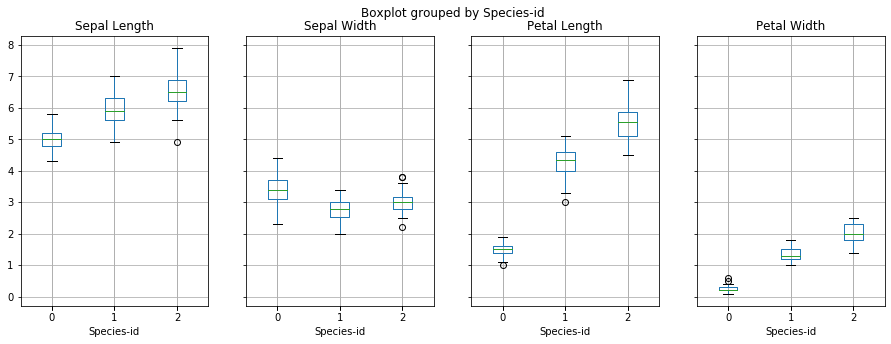

In [9]:
iris_features = tuple(df_iris.columns[:4].values)
df_iris.boxplot(column=iris_features, by='Species-id', figsize=(15,5), layout=(1,4));

#### Wine

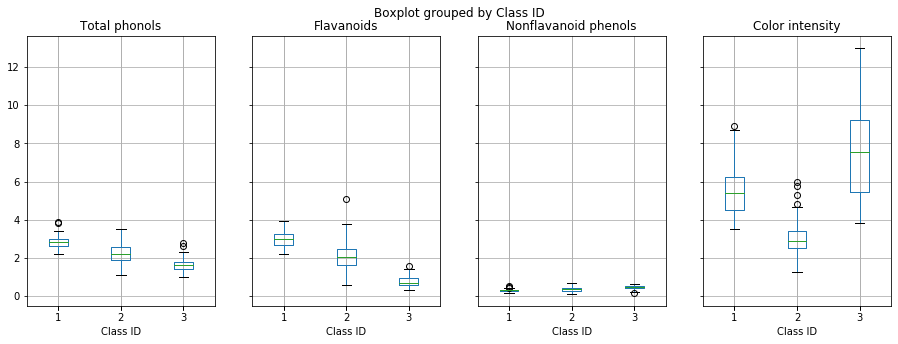

In [10]:
wine_features = ('Total phonols', 'Flavanoids', 'Nonflavanoid phenols', 'Color intensity')
df_wine.boxplot(column=wine_features, by='Class ID', figsize=(15,5), layout=(1,4));

<div class="alert-danger alert" role="alert-danger">
    <h4>TO DO: Visualize the Computer Hardware dataset</h4>
</div>

Some questions to ask yourself:
* What can be a good column to predict? 
* Select 2 columns that you think can predict your first column

In [11]:
# visualization of possible class/target column


In [12]:
# visualization of possible predicting feature columns


## Step 3. Selecting features (and scaling them)

Based on the data exploration, common sense and intuition, we now define 

* **y** = the class column. This will be the output of the ML model. 
* **X** = the set of columns which act as predicting features. This is the input of the ML model.

We will scale each feature (linearly) between 0 and 10.

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

#### Iris

Iris types: [0 1 2]
The length of X_iris: 149


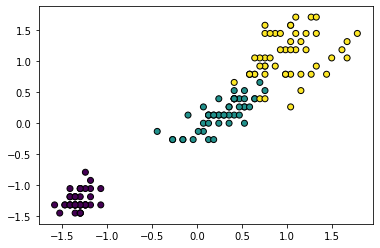

In [14]:
# Define X_iris (the predicting features) and y_iris (the class)
X_iris = df_iris[['Petal Length', 'Petal Width']]
y_iris = df_iris['Species-id']
print('Iris types:', df_iris['Species-id'].unique())

# Normalize
scaler_iris = StandardScaler().fit(X_iris)
X_iris = scaler_iris.transform(X_iris)
print('The length of X_iris: {}'.format(len(X_iris)))

plt.scatter(X_iris[:,0], X_iris[:,1], edgecolors='k', c=y_iris);

#### Wine

wine types: [1 2 3]
The length of X_wine: 177


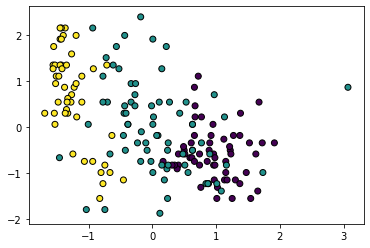

In [15]:
# Define X_wine and y_wine
X_wine = df_wine[['Flavanoids', 'Nonflavanoid phenols']]
y_wine = df_wine['Class ID']
print('wine types:', df_wine['Class ID'].unique())

# Normalize
scaler_wine = StandardScaler().fit(X_wine)
X_wine = scaler_wine.transform(X_wine)
print('The length of X_wine: {}'.format(len(X_wine)))

plt.scatter(X_wine[:,0], X_wine[:,1], edgecolors='k', c=y_wine);

<div class="alert-danger alert" role="alert-danger">
    <h4>TO DO: Hardware </h4>
</div>

In [ ]:
# Define X_machine and y_machine
X_machine = ..
y_machine = ..

print('classification possibilities:', y_machine.unique())

# Normalize

# Scatter plot


## Step 4. Dividing your data into a training and test set

We will split the data (both the X matrix and the y array) into a train set and test set.

#### Iris 

Train shape: (111, 2) 111
Test shape: (38, 2) 38


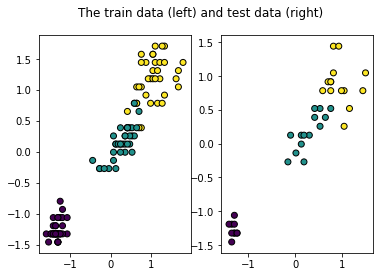

In [17]:
# Split in train and test sets
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.25)
print('Train shape:', X_train_iris.shape, y_train_iris.size)
print('Test shape:', X_test_iris.shape, y_test_iris.size)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('The train data (left) and test data (right)')

ax1.scatter(X_train_iris[:,0], X_train_iris[:,1], edgecolors='k', c=y_train_iris);
ax2.scatter(X_test_iris[:,0], X_test_iris[:,1], edgecolors='k', c=y_test_iris);

#### Wine 

In [18]:
# Split in train and test sets
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, y_wine, test_size=0.25)
print('Train shape:', X_train_wine.shape, y_train_wine.shape)

Train shape: (132, 2) (132,)


<div class="alert-danger alert" role="alert-danger">
    <h4>TO DO: Hardware </h4>
</div>

In [19]:
# Split in train and test sets


## Step 5. Training your Machine learning algorithm

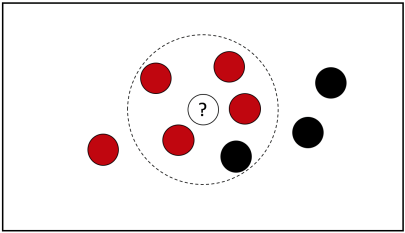
<i>Figure 1: A data point is classified by majority votes from its 5 nearest neighbors. Here, the unknown point would be classified as red, since 4 out of 5 neighbors are red.</i>

The library sklearn contains an implementation of the NearestNeighbors algorithm:

In [20]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KDTree
from matplotlib.colors import ListedColormap

#### Iris
We create a KNN model and train it using the training set and training labels.

In [21]:
## we create an instance of Neighbours Classifier and fit the data.

print('Number of training points: ',X_train_iris.size)
print('Number of classes: ',df_iris.Species.unique().size)

clf_iris = KNeighborsClassifier(5)
clf_iris.fit(X_train_iris, y_train_iris)

Number of training points:  222
Number of classes:  3


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Now the trained ("fitted") model can be used for predictions.

In [24]:
# For example, let's consider two new flowers, 
# one with Petal length = -0.9, Petal Width = -1  (scaled values) 
# and with Petal length = 1, Petal Width = 1.3  (scaled values) 

some_flowers_X = [[-0.9,-1], [1,1.3]]

# The model predicts..
some_flowers_y = clf_iris.predict(some_flowers_X)
print("The predicted species are\n \
   flower 1: Species_id = {0}\n \
   flower 2: Species_id = {1}\n".format(some_flowers_y[0],some_flowers_y[1]))

The predicted species are
    flower 1: Species_id = 0
    flower 2: Species_id = 2



#### Wine

In [25]:
clf_wine = KNeighborsClassifier(5)
clf_wine.fit(X_train_wine, y_train_wine)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

<div class="alert-danger alert" role="alert-danger">
    <h4>TO DO: Hardware</h4>
</div>

## Step 6 - Evaluating the result of learning: accuracy
The accuracy of the KNN algorithm is based on the correct predicted labels of the hold-out test set.

#### Iris dataset

In [26]:
#Evaluate performance (with test set)
print('Number of test points: ',X_test_iris.size)
y_pred_iris = clf_iris.predict(X_test_iris)

Number of test points:  76


Accuracy score for the Iris Dataset:

In [27]:
metrics.accuracy_score(y_test_iris, y_pred_iris)

0.9736842105263158

<div class="alert-danger alert" role="alert-danger">
<h4>TO DO: Wine and Hardware</h4>
In the same manner, evaluate the accuracy of the Wine and the Hardware models.
</div>

## Step 7. Applying the ML models
Finally, let's predict! The created models can be applied to new datapoints, for which there is no given label. The prediction results can be trusted with the accuracy computed in step 6.  

<div class="alert-danger alert" role="alert-danger">
<h4>TO DO: Flowers, Wine and Hardware</h4>
Apply the models to some new flowers, new wines or new computer pieces.
</div>